In [ ]:
# #-*- coding: utf-8 -*-

In [2]:
import pandas as pd
import numpy as np
import csv
import seaborn as sns; sns.set
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
pd.set_option('max_columns', 24,'max_rows', 38)

# 데이터 불러오기

In [4]:
df = pd.read_csv('Auction_master_train_1.csv', encoding='cp949')

In [5]:
df.head(25)

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,...,Total_floor,Current_floor,Specific,Share_auction_YorN,road_name,road_bunji1,road_bunji2,Close_date,Close_result,point.y,point.x,Hammer_price
0,2687,임의,개별,1766037301,정명감정,2017-07-26 00:00:00,2,1,12592.0,37.35,37.35,181.77,...,45,5,NaN,N,해운대해변로,30.0,NaN,2018-06-14 00:00:00,배당,35.162717,129.137048,760000000
1,2577,임의,일반,152946867,희감정,2016-09-12 00:00:00,2,1,42478.1,18.76,18.76,118.38,...,70,51,NaN,N,마린시티2로,33.0,NaN,2017-03-30 00:00:00,배당,35.156633,129.145068,971889999
2,2197,임의,개별,11326510,혜림감정,2016-11-22 00:00:00,3,2,149683.1,71.00,71.00,49.94,...,15,14,NaN,N,모라로110번길,88.0,NaN,2017-12-13 00:00:00,배당,35.184601,128.996765,93399999
3,2642,임의,일반,183581724,신라감정,2016-12-13 00:00:00,2,1,24405.0,32.98,32.98,84.91,...,20,11,NaN,N,황령대로319번가길,110.0,NaN,2017-12-27 00:00:00,배당,35.154180,129.089081,256899000
4,1958,강제,일반,45887671,나라감정,2016-03-07 00:00:00,2,1,774.0,45.18,45.18,84.96,...,7,7,NaN,N,오작로,51.0,NaN,2016-10-04 00:00:00,배당,35.099630,128.998874,158660000
5,2238,강제,일반,105437195,한마음감정,2017-01-03 00:00:00,2,1,8635.0,41.39,41.39,84.46,...,20,17,NaN,N,일산봉로,58.0,NaN,2017-10-25 00:00:00,배당,35.086933,129.065706,206989000
6,1923,임의,일반,137548730,미래새한감정,2016-01-19 00:00:00,3,2,7927.0,81.77,81.77,112.70,...,6,6,NaN,N,동삼서로,61.0,NaN,2016-11-03 00:00:00,배당,35.084049,129.070231,135500000
7,2527,임의,일반,506916971,부일감정,2016-04-28 00:00:00,2,1,331281.0,92.22,92.22,243.35,...,24,13,NaN,N,분포로,111.0,NaN,2016-11-22 00:00:00,배당,35.127808,129.112206,640299999
8,2259,강제,일반,40782876,금정감정,2016-03-08 00:00:00,2,1,1017.0,66.44,66.44,67.21,...,3,1,NaN,N,천마로27번길,10.0,NaN,2016-09-27 00:00:00,배당,35.080817,129.020155,77380000
9,2666,임의,일반,150000000,연산감정,2017-03-27 00:00:00,2,1,27447.2,78.52,78.52,84.92,...,5,4,NaN,N,재반로84번길,96.0,7.0,2017-12-27 00:00:00,배당,35.187903,129.130913,177070000


# 1. 결측치 제거

In [6]:
df.isnull()

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,...,Total_floor,Current_floor,Specific,Share_auction_YorN,road_name,road_bunji1,road_bunji2,Close_date,Close_result,point.y,point.x,Hammer_price
0,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1928,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False,False,False
1929,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False,False,False
1930,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False,False,False
1931,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False,False,False


In [7]:
df2 = df.copy()

In [8]:
print(df2.dropna(axis=1).shape)

(1933, 35)


In [9]:
df2.isnull().sum(axis=0)

Auction_key          0
Auction_class        0
Bid_class            0
Claim_price          0
Appraisal_company    0
                    ..
Close_date           0
Close_result         0
point.y              0
point.x              0
Hammer_price         0
Length: 41, dtype: int64

# 2. 상관관계 히트맵

Hammer_price와 각 변수 사이의 상관관계 show

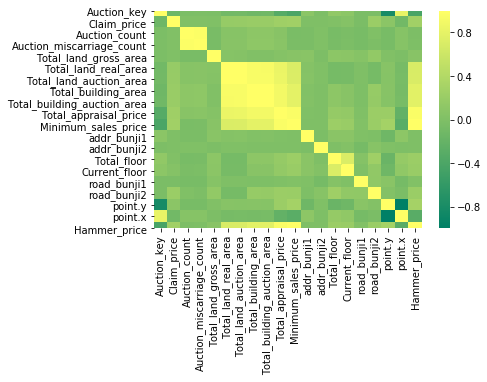

In [10]:
sns.heatmap(df2.corr(),cmap='summer')

# 3. 분포 히스토그램

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000163F6F99DC8>,
      dtype=object)

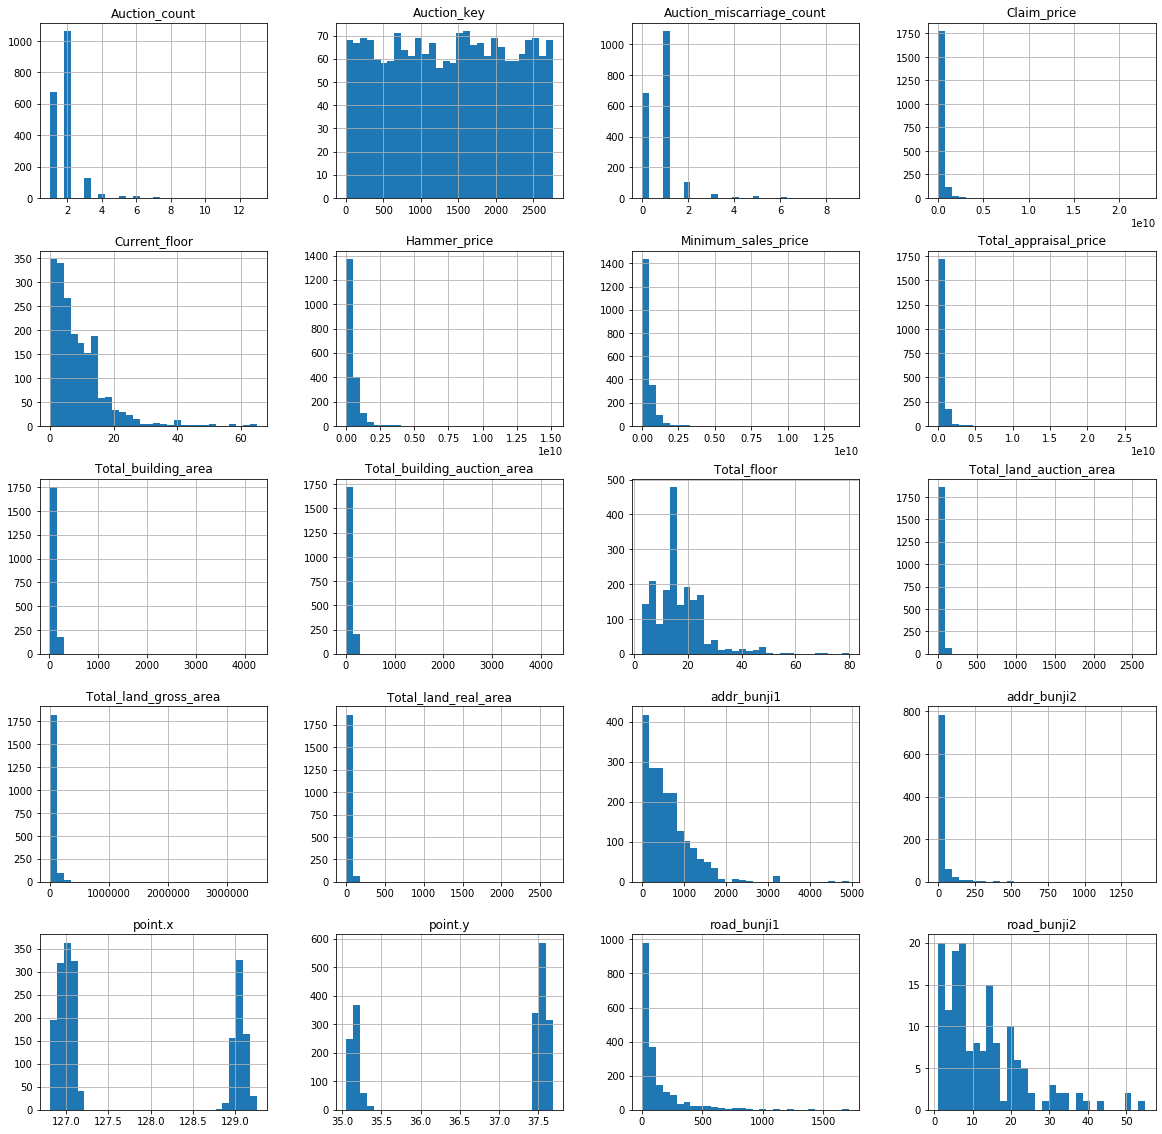

In [11]:
df2.hist(bins=30,figsize=(20,20))

# 4. 시각화

In [12]:
df2.columns #데이터프레임 열 이름 나열

Index(['Auction_key', 'Auction_class', 'Bid_class', 'Claim_price',
       'Appraisal_company', 'Appraisal_date', 'Auction_count',
       'Auction_miscarriage_count', 'Total_land_gross_area',
       'Total_land_real_area', 'Total_land_auction_area',
       'Total_building_area', 'Total_building_auction_area',
       'Total_appraisal_price', 'Minimum_sales_price', 'First_auction_date',
       'Final_auction_date', 'Final_result', 'Creditor', 'addr_do', 'addr_si',
       'addr_dong', 'addr_li', 'addr_san', 'addr_bunji1', 'addr_bunji2',
       'addr_etc', 'Apartment_usage', 'Preserve_regist_date', 'Total_floor',
       'Current_floor', 'Specific', 'Share_auction_YorN', 'road_name',
       'road_bunji1', 'road_bunji2', 'Close_date', 'Close_result', 'point.y',
       'point.x', 'Hammer_price'],
      dtype='object')

# 4-1. hammer price의 분포

C:\Users\lcm01\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45209 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\lcm01\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 52272 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\lcm01\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\lcm01\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 45209 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\lcm01\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 52272 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\lcm01\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44032 missing from curre

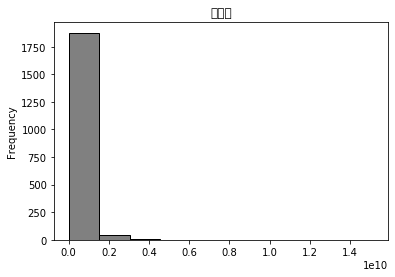

In [13]:
df2['Hammer_price'].plot.hist(bins=10,color='grey',edgecolor='black')
plt.title('낙찰가')
plt.show()

# 4-2. 낙찰가-총감정가 산점도

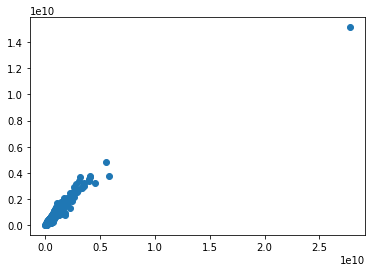

In [15]:
plt.scatter(x='Total_appraisal_price', y='Hammer_price', data=df)
plt.show()

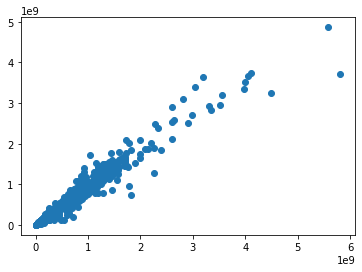

In [16]:
# 이상치 제거
df_3 = df2.query('Total_appraisal_price < 1e10 & Hammer_price <1e10')
plt.scatter(x='Total_appraisal_price', y='Hammer_price', data=df_3)
plt.show()

In [17]:
#한글 깨짐 현상 해결
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# 4-3. pie-chart

In [18]:
bid_class = df2['Bid_class'].value_counts()

In [19]:
bid_class = bid_class.rename(index={"일반":0})

In [20]:
bid_class = bid_class.rename(index={"개별":1})

In [21]:
bid_class = bid_class.rename(index={"일괄":2})

In [22]:
bid_class #index명 변경한 bid_class

0    1796
1     125
2      12
Name: Bid_class, dtype: int64

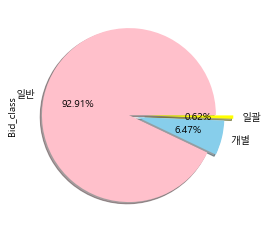

In [23]:
# Pie-chart
bid_class.plot.pie(explode=[0,0.1, 0.2],autopct='%1.2f%%',shadow=True, labels =['일반','개별','일괄'],colors =['pink','skyblue','yellow']) 
plt.show()

# 4-4.경매구분(강제/일반)

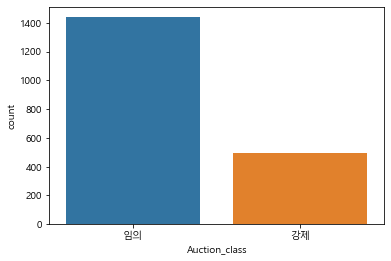

In [24]:
sns.countplot("Auction_class" ,data=df2)
plt.show()

# 4-5.count plot 

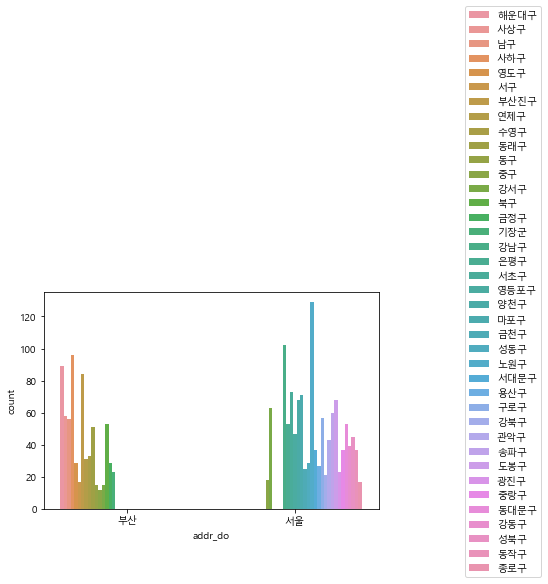

In [25]:
sns.countplot("addr_do", hue='addr_si', data=df2)
plt.legend(loc='right',bbox_to_anchor=(1.5,1))
plt.show() 

# 5. 피처 생성

# 5-1 현재 층수 기준 저/중/고층 피처 생성

In [27]:
def floor(x):
    if 0 <= x <= 10:
        return '저층'
    elif 11 <= x <= 20:
        return '중층'
    else:
        return '고층'

df2['층수'] = df2['Current_floor'].apply(floor)

# 5-2.  날짜 피처 생성

In [44]:
df2['First_auction_date'].head()

0    2018-02-13 00:00:00
1    2016-12-29 00:00:00
2    2017-07-28 00:00:00
3    2017-07-20 00:00:00
4    2016-07-06 00:00:00
Name: First_auction_date, dtype: object

In [45]:
df2['year'] = df2['First_auction_date'][0:3]

In [ ]:
# 5-3. 날짜 피처 생성
def year(x):
    if '2014-01-01 0:00' <= x < '2015-01-01 0:00':
        return '2014년'
    elif '2015-01-01 0:00' <= x < '2016-01-01 0:00':
        return '2015년'
    elif '2016-01-01 0:00' <= x < '2017-01-01 0:00':
        return '2016년'
    elif '2017-01-01 0:00' <= x < '2018-01-01 0:00':
        return '2017년'
    else:
        return '확인 요망'

df2['year'] = df2['Appraisal_date'].apply(year)

날짜 피처를 생성하고 싶었는데 연도만 분리하는 데에 문제가 생겨 피처를 완성하지 못했습니다.

# 5-3. 피처 생성

C:\Users\lcm01\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\lcm01\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


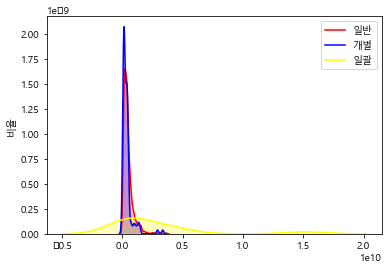

In [26]:
g = sns.kdeplot(df2.query("Bid_class == '일반'")['Hammer_price'], color = "red",shade= True)
g = sns.kdeplot(df2.query("Bid_class == '개별'")['Hammer_price'], color = 'blue', shade = True)
g = sns.kdeplot(df2.query("Bid_class == '일괄'")['Hammer_price'], color = 'yellow', shade = True)

g.set_ylabel('비율')
g =g.legend(['일반','개별','일괄'])
plt.show()

# 5-4 총경매횟수 피처생성

In [29]:
def count_auc(x):
    if 0 <= x <= 1:
        return '1회'
    elif 2 <= x <= 3:
        return '2-4회'
    else:
        return '5회 이상'

df2['count_auc'] = df2['Auction_count'].apply(count_auc)

# 5-5 건물 총 층수 피처 생성

In [30]:
def tot_floor(x):
    if 0 <= x <= 10:
        return '저층'
    elif 11 <= x <= 20:
        return '중층'
    else:
        return '고층'

df2['총층수'] = df2['Total_floor'].apply(tot_floor)

# 5-6. 실면적/전체면적 비율 피처 생성

In [31]:
# 대지활용도=실면적/전체면적 열 추가

df2['대지활용비율'] = df2['Total_land_real_area'] / df2['Total_land_gross_area']

In [32]:
df2['대지활용비율'].head(20)

0     0.002966
1     0.000442
2     0.000474
3     0.001351
4     0.058372
5     0.004793
6     0.010315
7     0.000278
8     0.065329
9     0.002861
10    0.015152
11    0.007412
12    0.003569
13         NaN
14    0.000979
15    0.001306
16    0.002118
17    0.022931
18    0.052243
19    0.028387
Name: 대지활용비율, dtype: float64

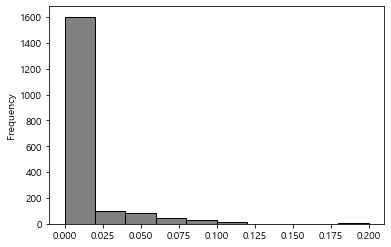

In [33]:
df2['대지활용비율'].plot.hist(bins=10,color='grey',edgecolor='black',
                        range=[0,0.2])

In [34]:
def area_ratio(x):
    if 0 <= x <= 0.025:
        return '낮음'
    else:
        return '높음'

df2['대지활용도'] = df2['대지활용비율'].apply(area_ratio) #피처 생성

# 5-7. Good Deal 피처 생성

In [35]:
# 총감정가 대비 낙찰가 열 추가

df2['총감정가_낙찰가'] = df2['Total_appraisal_price'] / df2['Hammer_price']

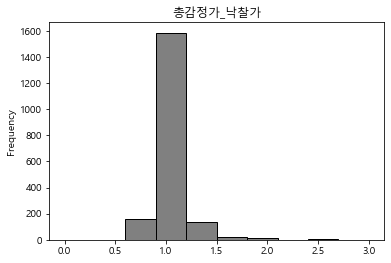

In [36]:
df2['총감정가_낙찰가'].plot.hist(bins=10,color='grey',edgecolor='black',
                         range=[0,3])
plt.title('총감정가_낙찰가')
plt.show()

# 5-8 Good_Deal 피처 생성

In [37]:
# 5-8 Good_Deal 피처 생성
def deal(x):
    if 0 <= x <= 1:
        return 'Bad Deal'
    elif x == 1:
        return '적정'
    else:
        return 'Good Deal'

df2['deal'] = df2['총감정가_낙찰가'].apply(deal)

# 5-9 유찰비율 피처 생성

In [38]:
df2['유찰비율'] = df2['Auction_miscarriage_count'] / df2['Auction_count']

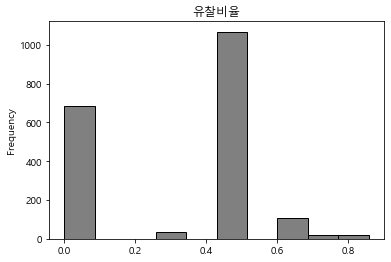

In [39]:
df2['유찰비율'].plot.hist(bins=10,color='grey',edgecolor='black')
plt.title('유찰비율')
plt.show()

In [40]:
def popularity(x):
    if 0 <= x <= 0.3:
        return '좋은 매물'
    elif 0.3 <= x <= 0.6:
        return '일반 매물'
    else:
        return '나쁜 매물'

df2['ratio_유찰'] = df2['유찰비율'].apply(popularity)

# 5-10. 경매 신청인의 만족도 피처 생성

In [41]:
df2['낙찰가/청구가'] = df2['Hammer_price'] / df2['Claim_price']

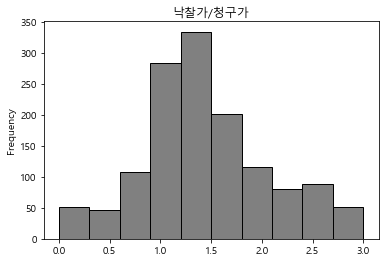

In [42]:
df2['낙찰가/청구가'].plot.hist(bins=10,color='grey',edgecolor='black',
                         range=[0,3])
plt.title('낙찰가/청구가')
plt.show()

In [43]:
#만족도 피처 생성
def satisfaction(x):
    if 0 <= x <= 1:
        return '불만족'
    elif x == 1:
        return '적정'
    else:
        return '만족'

df2['주인_satis'] = df2['낙찰가/청구가'].apply(satisfaction)